In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\training'
valid_path = r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\testing'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
#remove kast layer
for layer in vgg.layers:
    layer.trainable = False

In [9]:
#for getting number of output classes
folders = glob('dataset-main/training/*')
print(folders)

['dataset-main/training\\0', 'dataset-main/training\\1', 'dataset-main/training\\2', 'dataset-main/training\\3', 'dataset-main/training\\4']


In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#cost and optimization method
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset-main/training',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3662 images belonging to 5 classes.


In [14]:
# Make sure you provide the same target size as initialied for the image size
testing_set = test_datagen.flow_from_directory('dataset-main/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 734 images belonging to 5 classes.


In [15]:
# fit the model
history = model.fit_generator(training_set,
                              validation_data=testing_set,
                              epochs=5,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(testing_set))

C:\Users\smartbridge\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
23/23 [==============================] - 514s 22s/step - loss: 1.5696 - accuracy: 0.5232 - val_loss: 1.0279 - val_accuracy: 0.7057
Epoch 2/10
23/23 [==============================] - 516s 23s/step - loss: 0.9878 - accuracy: 0.6669 - val_loss: 0.7652 - val_accuracy: 0.7166
Epoch 3/10
23/23 [==============================] - 488s 21s/step - loss: 0.8821 - accuracy: 0.6811 - val_loss: 0.8215 - val_accuracy: 0.7112
Epoch 4/10
23/23 [==============================] - 490s 22s/step - loss: 1.0339 - accuracy: 0.6493 - val_loss: 0.7537 - val_accuracy: 0.7084
Epoch 5/10
23/23 [==============================] - 510s 22s/step - loss: 0.8228 - accuracy: 0.6799 - val_loss: 0.9513 - val_accuracy: 0.6649
Epoch 6/10
23/23 [==============================] - 498s 22s/step - loss: 0.7703 - accuracy: 0.7341 - val_loss: 0.6700 - val_accuracy: 0.7534
Epoch 7/10
23/23 [==============================] - 539s 24s/step - loss: 0.7223 - accuracy: 0.7146 - val_loss: 0.7019 - val_accuracy: 0.7439
Epoch 

In [16]:
model.save('diabetic.h5')

In [17]:
import matplotlib.pyplot as plt

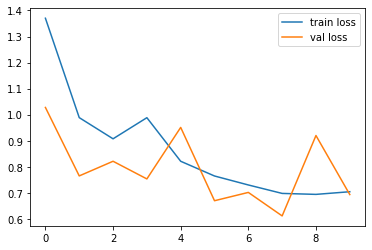

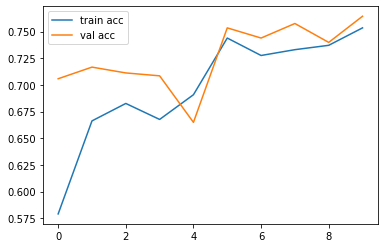

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model

In [23]:
y_pred = model.predict(testing_set)
y_pred

array([[9.9945968e-01, 3.2724623e-05, 4.4604170e-04, 4.2422475e-06,
        5.7228852e-05],
       [1.5823907e-01, 1.3998413e-01, 6.8489599e-01, 3.7085412e-03,
        1.3172372e-02],
       [7.1865571e-01, 1.7000604e-01, 1.0888760e-01, 1.0744389e-03,
        1.3762192e-03],
       ...,
       [3.0829105e-01, 1.4416593e-01, 4.9092549e-01, 3.4495328e-02,
        2.2122143e-02],
       [4.3363795e-01, 2.2345522e-01, 3.0342954e-01, 2.8627535e-02,
        1.0849807e-02],
       [3.2677251e-01, 6.2419802e-02, 3.2094991e-01, 1.3820435e-02,
        2.7603731e-01]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 4, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1,
       3, 3, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('diabetic.h5')

In [77]:
img=image.load_img(r'D:\Rammohan\AI ML Projects\Diabetic\dataset-main\testing\4\d271d3a2b552.png',target_size=(224,224))

In [78]:
x=image.img_to_array(img)
x

array([[[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]],

       ...,

       [[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]],

       [[3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.],
        ...,
        [3., 1., 2.],
        [3., 1., 2.],
        [3., 1., 2.]]], dtype=float32)

In [79]:
x.shape

(224, 224, 3)

In [80]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [81]:
model.predict(img_data)

array([[1.0000000e+00, 0.0000000e+00, 1.4347949e-17, 0.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [82]:
a=np.argmax(model.predict(img_data), axis=1)

In [83]:
index=['0', '1', '2', '3', '4']
result = str(index[a[0]])
result

'0'